# Lab 7
## Brooke Hunter Submission


In [1]:
# Install package for obtaining USGS streamflow data
!pip install -U dataretrieval

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis


---------------
## Question 1 (10 points)

Make a new `jupyter notebook` called `lab7_submission.ipynb` and complete the following tasks:


* Download daily values (i.e. `service='dv'`) for another station and time period of your choosing.



* Plot one column



* In a **markdown** cell below, describe what your plot shows



A map of station ID numbers can be found here: https://maps.waterdata.usgs.gov/mapper/index.html

A table of the parameter codes can be found here: https://help.waterdata.usgs.gov/parameter_cd?group_cd=PHY

---------------

In [4]:
# Specify the USGS site code
site = '05341550' #Station in Stillwater, Minnesota

# Get instantaneous values (iv)
df = nwis.get_record(sites=site, service='dv', start='2020-01-01', end='2021-12-31')
df

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
2020-01-01 00:00:00+00:00,7120.0,"A, e",05341550
2020-01-02 00:00:00+00:00,7630.0,"A, e",05341550
2020-01-03 00:00:00+00:00,8490.0,"A, e",05341550
2020-01-04 00:00:00+00:00,8870.0,"A, e",05341550
2020-01-05 00:00:00+00:00,9100.0,"A, e",05341550
...,...,...,...
2021-12-27 00:00:00+00:00,3170.0,P,05341550
2021-12-28 00:00:00+00:00,2980.0,P,05341550
2021-12-29 00:00:00+00:00,2810.0,P,05341550


<AxesSubplot:xlabel='datetime'>

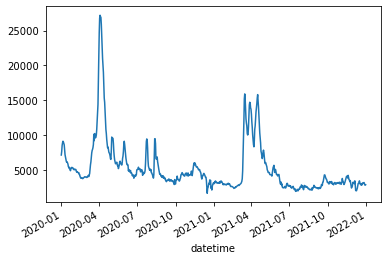

In [5]:
# plot one column
df['00060_Mean'].plot()

The plot above shows daily mean discharge (cfs - cubic feet per second) at a USGS station in Stillwater Minnesota alond the St. Croix River. This is for the time period January 1st 2020 to December 31 2021, so two years of data. 

---------------
## Question 2 (10 points)

* Make an HTML table that contains the **site name**, **site number** and **mean daily discharge** between Oct 31, 2020 and Sep 30, 2021 (zero decimal places)** for **three** rivers in the US.

HINT: the discharge parameter is `00060_Mean`. If the data from your site does not contain this column, try another site.

--------------

In [6]:
# Specify the USGS site code
stillwater_site = '05341550' #Station in Stillwater, Minnesota (St. Croix)
minnehaha_site = '05289800' #Station in St Paul, Minnesota (Minnehaha Creek)
fall_site = '14151000' #Station in Fall Creek Oregon (Fall Creek)

# Get instantaneous values (iv)
still = nwis.get_record(sites=stillwater_site, service='dv', start='2020-10-31', end='2021-09-30')
haha = nwis.get_record(sites=minnehaha_site, service='dv', start='2020-10-31', end='2021-09-30')
fall = nwis.get_record(sites=fall_site, service='dv', start='2020-10-31', end='2021-09-30')


In [7]:
still['00060_Mean'].mean()

4542.537313432836

In [8]:
haha['00060_Mean'].mean()

14.736210526315789

In [9]:
fall['00060_Mean'].mean()

383.0268656716418

<table>
  <tr>
    <th>Site Name</th>
    <th>Site Number</th>
    <th>Mean Daily Discharge (cfs)</th>
  </tr>
  <tr>
    <td>Stillwater, MN</td>
    <td>05341550</td>
    <td>4542</td>
  </tr>
  <tr>
    <td>Minnehaha, MN</td>
    <td>05289800</td>
    <td>15</td>
  </tr>
    <tr>
    <td>Fall Creek, OR</td>
    <td>14151000</td>
    <td>383</td>
  </tr>
</table>

---------------
## Question 3 (10 points)

* Make a new map of the tallest mountains in Oregon but include a popup that displays the `Isolation` data as a **float**.

--------------

## Extra credit/grad students 

* Add a popup that includes the name of the mountain as a `string` (without any square brackets).  

--------------


In [10]:
# Import packages
import numpy as np
import pandas as pd
import folium

In [11]:
# Read HTML table data
#mountains = pd.read_html('https://en.wikipedia.org/wiki/List_of_mountain_peaks_of_Oregon')
mountains = pd.read_html('https://en.wikipedia.org/wiki/List_of_mountain_peaks_of_Oregon')
#mountains

In [12]:
# Print number of tables on webpage
len(mountains)

13

In [13]:
# We would like the table that contains the highest summits of Oregon which happens to be the second one
mountain_stats = mountains[1]
# Some wrangling
mountain_stats['Location'] = mountain_stats['Location'].str.replace(mountain_stats['Location'].loc[0], "45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W", regex=True)

In [14]:
mountain_stats

,Rank,Mountain peak,Mountain range,Elevation,Prominence,Isolation,Location
0,1,Mount Hood[6][7][8][9][a],Cascade Range,3428.8 m,2349 m,92.2 km,45°22′25″N 121°41′45″W﻿ / ﻿45.3735°N 121.6959°W
1,2,Mount Jefferson[10][11][12][13][b],Cascade Range,3201 m,1767 m,77.5 km,44°40′27″N 121°47′59″W﻿ / ﻿44.6743°N 121.7996°W
2,3,South Sister[14][15][16][17],Cascade Range,3158.5 m,1705 m,63.4 km,44°06′13″N 121°46′09″W﻿ / ﻿44.1035°N 121.7693°W
3,4,North Sister[18][19][20][21][c],Cascade Range,3075 m,837 m,7 km,44°10′00″N 121°46′20″W﻿ / ﻿44.1666°N 121.7723°W
4,5,Middle Sister[22][23][24][25][d],Cascade Range,3064 m,382 m,1.8 km,44°08′54″N 121°47′02″W﻿ / ﻿44.1483°N 121.7840°W
5,6,Sacajawea Peak[26][27][28][e][f],Wallowa Mountains,3000 m,1949 m,202 km,45°14′42″N 117°17′34″W﻿ / ﻿45.2450°N 117.2929°W
6,7,Steens Mountain[29][30][31][g],Steens Mountain,2968 m,1336 m,201 km,42°38′11″N 118°34′36″W﻿ / ﻿42.6364°N 118.5767°W
7,8,Aneroid Mountain[32][33][34][35],Wallowa Mountains,2958.7 m,647 m,9.48 km,45°12′11″N 117°10′30″W﻿ / ﻿45.2030°N 117.1750°W
8,9,Twin Peaks[36][37][38][h],Wallowa Mountains,2950 m,610 m,7.79 km,45°18′17″N 117°20′43″W﻿ / ﻿45.3046°N 117.3452°W
9,10,Red Mountain[39][40][41][42],Wallowa Mountains,2913.8 m,610 m,11.84 km,45°03′52″N 117°14′46″W﻿ / ﻿45.0644°N 117.2460°W


In [15]:
mountain_stats.dtypes

Rank               int64
Mountain peak     object
Mountain range    object
Elevation         object
Prominence        object
Isolation         object
Location          object
dtype: object

### Convert coordinates to `float` 

As can be seen from above, our `Location` column is an `object` datatype which is not very useful. But web scraping is all about data wrangling. So we will convert it to a `float` so we can plot these mountains on a map.

In [16]:
# Have a look at the location object
mountain_stats['Location'].iloc[0]

# The latitude is string position 27 to 34
lat1 = mountain_stats['Location'].iloc[0][27:34]

# The longitude is string position 37 to 45
lon1 = mountain_stats['Location'].iloc[0][37:45]

In [17]:
# To get these data from every row, we can write a quick for loop
coords = []
for i in range(len(mountain_stats)):
    lat = float(mountain_stats['Location'].iloc[i][27:34])
    lon = float(mountain_stats['Location'].iloc[i][37:45]) * -1
    coords.append((lat, lon))
#coords

## Convert `Elevation` and `Isolation` to float

It would also be useful to convert other columns to float so we can analyze the data. To do this we'll have to drop the `m` from the data. 

Remember when we index a string, a `:` used on the **right** side of the index will get everything **after** that particular index as an output. Alternatively, a `:` used on the **left** side of the index will get everything **before** that particular index as an output.

Also remember that we can pass **negative numbers** to index from the **end** of the string (instead of from the start).

In [18]:
# To get these data from every row, we can write another quick for loop
elevation = []
isolation = []
names = []
for i in range(len(mountain_stats)):
    elev = float(mountain_stats['Elevation'].iloc[i][:-2])
    elevation.append(elev)
    
    iso = float(mountain_stats['Isolation'].iloc[i][:-2])
    isolation.append(iso)
    
    name = str(mountain_stats['Mountain peak'].iloc[i][:-2]).split("[")[0]
    names.append(name)
    
#elevation

In [19]:
#isolation

In [20]:
#names

## Plot map with isolation pop up

In [21]:
map = folium.Map(location=[44, -121], zoom_start=6)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup=isolation[i]).add_to(map)
map

## Plot map with name pop up

In [22]:
map = folium.Map(location=[44, -121], zoom_start=6)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup=names[i]).add_to(map)
map

---------------
## Question 4 (10 points)

* Write a script to automatically derive the geographic coordinates for the following addresses:

    * 1844 SW Morrison St, Portland, OR 97205
    
    * 800 Occidental Ave S, Seattle, WA 98134
    
    * 1001 Stadium Dr, Inglewood, CA 90301
    
    * 2700 Martin Luther King Jr Blvd, Eugene, OR 97401
    

You can **either** find each one individually **or** make a list of the addresses and use a for loop. 


* Plot the coordinates of these addresses on an interactive map using `folium` 



--------------


In [23]:
# Install webdriver_manager: https://github.com/SergeyPirogov/webdriver_manager
!pip3 install webdriver_manager

In [24]:
# Import packages
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

In [25]:
# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open a web browser at the following page
driver.get("https://en.wikipedia.org/wiki/Category:Ski_areas_and_resorts_in_Oregon")




====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been 

In [26]:
# Retrieve ski resort names
html_list = driver.find_element(By.ID, "mw-pages")
items = html_list.find_elements(By.TAG_NAME, "li")

In [27]:
addres_list = ['1844 SW Morrison St, Portland, OR 97205','800 Occidental Ave S, Seattle, WA 98134', '1001 Stadium Dr, Inglewood, CA 90301','2700 Martin Luther King Jr Blvd, Eugene, OR 97401']
addres_list

['1844 SW Morrison St, Portland, OR 97205',
 '800 Occidental Ave S, Seattle, WA 98134',
 '1001 Stadium Dr, Inglewood, CA 90301',
 '2700 Martin Luther King Jr Blvd, Eugene, OR 97401']

## Geocoding

Geocoding is the process of transforming an address (e.g. "1600 Amphitheatre Parkway, Mountain View, CA") into geographic coordinates (e.g. 37.423021, -122.083739). This is a hugely important part of mapping services like Google Maps and OpenStreetMap since it allows these services to place markers on a map, provide directions etc. There are many geocoding services but often they have a limit the number of free calls we can make. But if we're clever, we can geocode **unlimitedly** for **free** using Google Maps (https://www.google.com/maps) and automated web browsing. 

In [28]:
# Define test URL
url = 'https://www.google.com/maps/place/Hoodoo+Ski+Area+Oregon/'

# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open URL
driver.get(url)



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been 

In [29]:
addres_coords = []
# Loop through every ski resort to find it's coordinates
for add in addres_list:
       
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/'+ add + '/'
    print(url)
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    addres_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======


https://www.google.com/maps/place/1844 SW Morrison St, Portland, OR 97205/


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\brdeh\.wd

https://www.google.com/maps/place/800 Occidental Ave S, Seattle, WA 98134/


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\brdeh\.wd

https://www.google.com/maps/place/1001 Stadium Dr, Inglewood, CA 90301/


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\brdeh\.wd

https://www.google.com/maps/place/2700 Martin Luther King Jr Blvd, Eugene, OR 97401/


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\brdeh\.wd

In [30]:
addres_coords

[('45.5216776', '-122.693017'),
 ('47.5933101', '-122.3344609'),
 ('33.9530049', '-118.3407129'),
 ('44.0594287', '-123.0710918')]

In [31]:
map = folium.Map(location=[42, -121], zoom_start=5)
for i in range(0, len(addres_coords)):
    folium.Marker(addres_coords[i], popup=addres_list[i]).add_to(map)
map

---------------
## Question 5 (10 points)

* Which ski resort received **more** snowfall in 2020, Mount Ashland, Willammette Pass or Hoodoo? 

--------------

In [32]:
ski_resort_names = ['Hoodoo', 'Willamette Pass','Mount Ashland']
ski_resort_names

['Hoodoo', 'Willamette Pass', 'Mount Ashland']

In [33]:
ski_resort_coords = [('42.081689', '-122.7069373'), ('44.4086477', '-121.8735991'), ('43.6000579', '-122.0387233')]
ski_resort_coords

[('42.081689', '-122.7069373'),
 ('44.4086477', '-121.8735991'),
 ('43.6000579', '-122.0387233')]

In [34]:
map = folium.Map(location=[44, -121], zoom_start=6)
for i in range(0, len(ski_resort_names)):
    folium.Marker(ski_resort_coords[i], popup=ski_resort_names[i]).add_to(map)
map

In [35]:
# Import package
import xarray as xr


In [36]:

# Define filepath
fp = 'E:\GitHub\GeospatialDataAnalysis\geospatial-data-science\labs\lab7'
# Read data
xds = xr.open_dataset(fp + '/era_monthly_snowfall_2020.nc', decode_coords='all')
#xds

In [37]:
df = pd.DataFrame()
df['name'] = ski_resort_names
df['coords'] = ski_resort_coords
sf_test = []
for i in range(0, len(ski_resort_coords)):
    val_sf = xds['sf'].sel(latitude = ski_resort_coords[i][0], longitude = ski_resort_coords[i][1], method = 'nearest').sum().values
    sf_test.append(val_sf)
df['sf_t'] = sf_test
df.sort_values(["sf_t"], ascending=False)

,name,coords,sf_t
2,Mount Ashland,"(43.6000579, -122.0387233)",0.019636936
1,Willamette Pass,"(44.4086477, -121.8735991)",0.018596929
0,Hoodoo,"(42.081689, -122.7069373)",0.009228621


## Question 5 Answer
Most - Willammette Pass with 0.0196 meters of water equivalent

Middle - Hoodoo (ski area) with 0.0186 meters of water equivalent

Least - Mount Ashland Ski Area with 0.0092 meters of water equivalent

## Extra credit/grad students

Download `era_monthly_snowfall_1979_2020.nc` from the lab7 folder on Dropbox. 

* Rank the ski resorts by:

    * Average snowfall in **November**
    
    * Average snowfall in **Spring** (i.e. March, April, and May)
    
    * **Interannual variability** in snowfall 

In [38]:
# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open a web browser at the following page
driver.get("https://en.wikipedia.org/wiki/Category:Ski_areas_and_resorts_in_Oregon")

# Retrieve ski resort names
html_list = driver.find_element(By.ID, "mw-pages")
items = html_list.find_elements(By.TAG_NAME, "li")

ski_resort_names = []
for item in items:
    text = item.text
    print(text)
    ski_resort_names.append(text)
driver.close()



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been 

Anthony Lakes (ski area)
Mount Ashland Ski Area
Cooper Spur ski area
Ferguson Ridge Ski Area
Hoodoo (ski area)
Mount Ashland Ski Area Expansion
Mount Bachelor ski area
Mount Hood Meadows
Mount Hood Skibowl
Snow Bunny
Spout Springs Ski Area
Summit Pass (Oregon)
Timberline Lodge ski area
Warner Canyon
Willamette Pass Resort


In [39]:
import time
ski_resort_coords = []
# Loop through every ski resort to find it's coordinates
for resort in ski_resort_names:
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + resort + ' Oregon/'
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    time.sleep(3)
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    ski_resort_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been 

Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\brdeh\.wdm\drivers\chromedriver\win32\98.0.4758.102]


====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow643

In [40]:
ski_resort_coords

[('44.9629273', '-118.2357129'),
 ('42.081689', '-122.7069427'),
 ('45.4188609', '-121.6064525'),
 ('45.2816889', '-117.1148305'),
 ('44.4086477', '-121.8736045'),
 ('44.0294504', '-123.0520456'),
 ('44.0028975', '-121.6812601'),
 ('44.0294504', '-123.0520456'),
 ('45.2943644', '-121.7896261'),
 ('45.2871456', '-121.7312302'),
 ('45.7552462', '-118.0536097'),
 ('44.0304639', '-123.4892662'),
 ('45.3311319', '-121.7131951'),
 ('42.237378', '-120.2968271'),
 ('43.6000579', '-122.0387287')]

In [41]:
# Read data
xds2 = xr.open_dataset(fp + '/era_monthly_snowfall_1979_2020.nc', decode_coords='all')

In [42]:
nov = xds2.isel(time = xds2.time.dt.month == 11)
nov["time.month"]

<xarray.DataArray 'month' (time: 42)>
array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11], dtype=int64)
Coordinates:
  * time     (time) datetime64[ns] 1979-11-01 1980-11-01 ... 2020-11-01

In [43]:
spring = xds2.sel(time = xds2.time.dt.season == "MAM")
spring["time.month"]

<xarray.DataArray 'month' (time: 126)>
array([3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3,
       4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4,
       5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5,
       3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3,
       4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4,
       5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5], dtype=int64)
Coordinates:
  * time     (time) datetime64[ns] 1979-03-01 1979-04-01 ... 2020-05-01

In [44]:
year = xds2.resample(time='1Y').mean()
year

<xarray.Dataset>
Dimensions:    (time: 42, longitude: 49, latitude: 25)
Coordinates:
  * time       (time) datetime64[ns] 1979-12-31 1980-12-31 ... 2020-12-31
  * longitude  (longitude) float32 -128.0 -127.8 -127.5 ... -116.5 -116.2 -116.0
  * latitude   (latitude) float32 47.0 46.75 46.5 46.25 ... 41.5 41.25 41.0
Data variables:
    sf         (time, latitude, longitude) float32 -9.313e-10 ... 0.0003046

In [45]:
df2 = pd.DataFrame()
df2['name'] = ski_resort_names
df2['coords'] = ski_resort_coords
Nov_sf = []
Spring_sf = []
intvar = []

for i in range(0, len(ski_resort_coords)):
    nov_val_sf = nov['sf'].sel(latitude = ski_resort_coords[i][0], longitude = ski_resort_coords[i][1], method = 'nearest').mean().values
    Nov_sf.append(nov_val_sf)
    spring_val_sf = spring['sf'].sel(latitude = ski_resort_coords[i][0], longitude = ski_resort_coords[i][1], method = 'nearest').mean().values
    Spring_sf.append(spring_val_sf)
    intvar_val_sf = year['sf'].sel(latitude = ski_resort_coords[i][0], longitude = ski_resort_coords[i][1], method = 'nearest').std().values
    intvar.append(intvar_val_sf)
df2['Average Nov Snowfall'] = Nov_sf
df2['Average Spring Snowfall'] = Spring_sf
df2['Interannual Variability (standard dev of annual means)'] = intvar



In [46]:
df2.sort_values(["Average Nov Snowfall"], ascending=False)

,name,coords,Average Nov Snowfall,Average Spring Snowfall,Interannual Variability (standard dev of annual means)
6,Mount Bachelor ski area,"(44.0028975, -121.6812601)",0.0032581266,0.0020057987,0.00040021454
14,Willamette Pass Resort,"(43.6000579, -122.0387287)",0.002860935,0.0017587584,0.00036251967
4,Hoodoo (ski area),"(44.4086477, -121.8736045)",0.0025108436,0.0015250901,0.00034544914
3,Ferguson Ridge Ski Area,"(45.2816889, -117.1148305)",0.0022443563,0.0015363443,0.00026299493
8,Mount Hood Skibowl,"(45.2943644, -121.7896261)",0.002203377,0.001485502,0.00032707243
9,Snow Bunny,"(45.2871456, -121.7312302)",0.002203377,0.001485502,0.00032707243
12,Timberline Lodge ski area,"(45.3311319, -121.7131951)",0.002203377,0.001485502,0.00032707243
0,Anthony Lakes (ski area),"(44.9629273, -118.2357129)",0.0018615923,0.0011098591,0.00019159571
2,Cooper Spur ski area,"(45.4188609, -121.6064525)",0.0016262013,0.00081358914,0.00024317137
1,Mount Ashland Ski Area,"(42.081689, -122.7069427)",0.0016191967,0.0010225766,0.00031316077


In [47]:
df2.sort_values(["Average Spring Snowfall"], ascending=False)

,name,coords,Average Nov Snowfall,Average Spring Snowfall,Interannual Variability (standard dev of annual means)
6,Mount Bachelor ski area,"(44.0028975, -121.6812601)",0.0032581266,0.0020057987,0.00040021454
14,Willamette Pass Resort,"(43.6000579, -122.0387287)",0.002860935,0.0017587584,0.00036251967
3,Ferguson Ridge Ski Area,"(45.2816889, -117.1148305)",0.0022443563,0.0015363443,0.00026299493
4,Hoodoo (ski area),"(44.4086477, -121.8736045)",0.0025108436,0.0015250901,0.00034544914
8,Mount Hood Skibowl,"(45.2943644, -121.7896261)",0.002203377,0.001485502,0.00032707243
9,Snow Bunny,"(45.2871456, -121.7312302)",0.002203377,0.001485502,0.00032707243
12,Timberline Lodge ski area,"(45.3311319, -121.7131951)",0.002203377,0.001485502,0.00032707243
0,Anthony Lakes (ski area),"(44.9629273, -118.2357129)",0.0018615923,0.0011098591,0.00019159571
1,Mount Ashland Ski Area,"(42.081689, -122.7069427)",0.0016191967,0.0010225766,0.00031316077
13,Warner Canyon,"(42.237378, -120.2968271)",0.0013031556,0.0008413863,0.00019654837


In [48]:
df2.sort_values(["Interannual Variability (standard dev of annual means)"], ascending=False)

,name,coords,Average Nov Snowfall,Average Spring Snowfall,Interannual Variability (standard dev of annual means)
6,Mount Bachelor ski area,"(44.0028975, -121.6812601)",0.0032581266,0.0020057987,0.00040021454
14,Willamette Pass Resort,"(43.6000579, -122.0387287)",0.002860935,0.0017587584,0.00036251967
4,Hoodoo (ski area),"(44.4086477, -121.8736045)",0.0025108436,0.0015250901,0.00034544914
8,Mount Hood Skibowl,"(45.2943644, -121.7896261)",0.002203377,0.001485502,0.00032707243
9,Snow Bunny,"(45.2871456, -121.7312302)",0.002203377,0.001485502,0.00032707243
12,Timberline Lodge ski area,"(45.3311319, -121.7131951)",0.002203377,0.001485502,0.00032707243
1,Mount Ashland Ski Area,"(42.081689, -122.7069427)",0.0016191967,0.0010225766,0.00031316077
3,Ferguson Ridge Ski Area,"(45.2816889, -117.1148305)",0.0022443563,0.0015363443,0.00026299493
2,Cooper Spur ski area,"(45.4188609, -121.6064525)",0.0016262013,0.00081358914,0.00024317137
13,Warner Canyon,"(42.237378, -120.2968271)",0.0013031556,0.0008413863,0.00019654837
